In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### Importing the Mall Customer Dataset
mydata = pd.read_csv("dataset/Mall_Customers.csv")

In [72]:
mydata.head()

,CustomerID,Gender,Age,AnnualIncome,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [73]:
mydata.shape


(200, 5)

In [4]:
mydata.describe()

,CustomerID,Age,AnnualIncome,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
mydata.isnull().sum()

CustomerID         0
Gender             0
Age                0
AnnualIncome       0
Spending Score     0
dtype: int64

In [76]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       200 non-null    int64 
 1   Gender           200 non-null    object
 2   Age              200 non-null    int64 
 3   AnnualIncome     200 non-null    int64 
 4   Spending Score   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [85]:
mydata.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome ', 'Spending Score '], dtype='object')

In [138]:
iv=mydata[['AnnualIncome ','Spending Score ']]
iv.head()

,AnnualIncome,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [139]:
from sklearn.cluster import KMeans

In [146]:
kmeans = KMeans(n_clusters=3,n_init =10,random_state =0)
kmeans

KMeans(n_clusters=3, random_state=0)

In [148]:
kmeans.fit(iv)
y_predict=kmeans.predict(iv)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [149]:
mydata["cluster"]=y_predict
mydata

,CustomerID,Gender,Age,AnnualIncome,Spending Score,cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [150]:
df1=mydata[mydata.cluster==0]
df2=mydata[mydata.cluster==1]
df3=mydata[mydata.cluster==2]


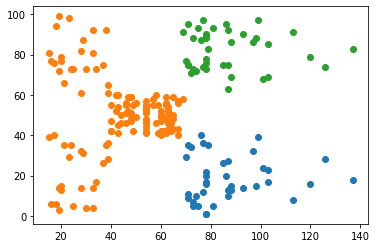

In [151]:
plt.scatter(df1['AnnualIncome '],df1['Spending Score '])
plt.scatter(df2['AnnualIncome '],df2['Spending Score '])
plt.scatter(df3['AnnualIncome '],df3['Spending Score '])

In [7]:
# using elbow method to select number of clusters

In [153]:
## Code to find within sum of squares
wss= []
for i in range(1,11) :
    kmeans = KMeans(n_clusters = i, n_init =10 ,random_state =0 )
    kmeans.fit(iv)
    wss.append(kmeans.inertia_)  #Inertia: Sum of distances of samples to their closest cluster center 
    print (i, kmeans.inertia_)
    
#find the values where change slowing down .   

C:\Users\NAVDEEP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 269981.28000000014
2 181363.59595959607
3 106348.37306211119
4 73679.78903948837
5 44448.45544793369
6 37265.86520484345
7 30259.657207285458
8 25095.703209997544
9 21830.04197804944
10 20736.67993892413


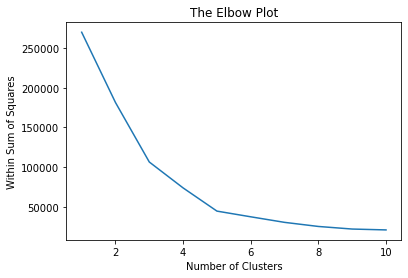

In [154]:
## Plotting the Within Sum of Squares
plt.plot(range(1,11),wss)
plt.title("The Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Sum of Squares")
plt.show()

In [155]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5 , n_init =10 , random_state =0 )
kmeans.fit_predict(iv)

# n_init : int, default: 10, Number of time the k-means algorithm will be run with different centroid seeds.


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [156]:
## Vizualizing the Clusters
iv['cluster']=kmeans.fit_predict(iv)
iv

<ipython-input-156-b60882bd12f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iv['cluster']=kmeans.fit_predict(iv)


,AnnualIncome,Spending Score,cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


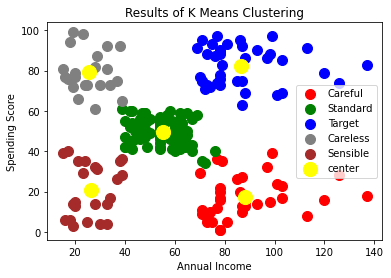

In [160]:
## Cluster Plot
plt.scatter(iv.loc[iv['cluster']==0,'AnnualIncome '],iv.loc[iv['cluster']==0,'Spending Score '],s=100,c='red',label='Careful')
plt.scatter(iv.loc[iv['cluster']==1,'AnnualIncome '],iv.loc[iv['cluster']==1,'Spending Score '],s=100,c='green',label='Standard')
plt.scatter(iv.loc[iv['cluster']==2,'AnnualIncome '],iv.loc[iv['cluster']==2,'Spending Score '],s=100,c='blue',label='Target')
plt.scatter(iv.loc[iv['cluster']==3,'AnnualIncome '],iv.loc[iv['cluster']==3,'Spending Score '],s=100,c='grey',label='Careless')
plt.scatter(iv.loc[iv['cluster']==4,'AnnualIncome '],iv.loc[iv['cluster']==4,'Spending Score '],s=100,c='brown',label='Sensible')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=200,c='yellow',label='center')

plt.title("Results of K Means Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()



In [16]:
kmeans.cluster_centers_

array([[ 8.82000000e+01,  1.71142857e+01,  4.00000000e+00],
       [ 8.65384615e+01,  8.21282051e+01,  2.00000000e+00],
       [ 2.63043478e+01,  2.09130435e+01,  3.00000000e+00],
       [ 2.57272727e+01,  7.93636364e+01,  1.00000000e+00],
       [ 5.52962963e+01,  4.95185185e+01, -1.33226763e-15]])

In [13]:

iv[(iv['cluster']==4)][['Spending Score (1-100)','cluster']]

,Spending Score (1-100),cluster
124,29,4
128,11,4
130,9,4
134,5,4
136,7,4
138,10,4
140,5,4
144,12,4
146,36,4
148,22,4
